In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import slic, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

In [5]:
og_lenna = plt.imread('./images/lenna.png')

lenna_img = np.array(og_lenna)

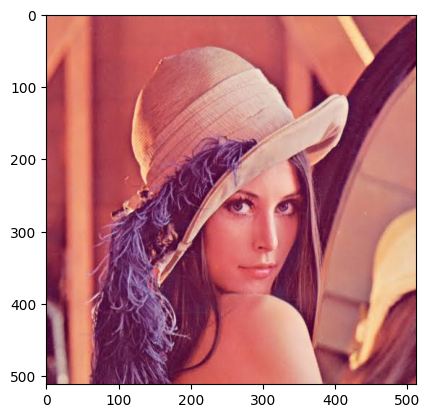

In [6]:
plt.imshow(og_lenna)

In [7]:
og_lenna.shape

(512, 512, 4)

Text(0.5, 1.0, 'cropped img')

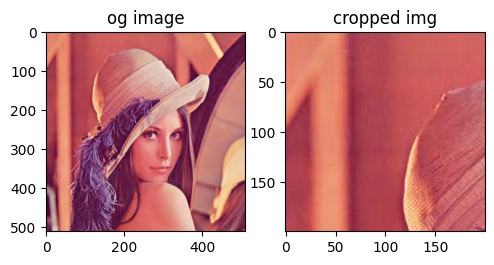

In [8]:
fig = plt.figure(figsize=(18,7))
fig.tight_layout()
row = 2
col = 6
cropped_img = og_lenna[0:200,0:200]

fig.add_subplot(row,col,1)
plt.imshow(og_lenna)
plt.title("og image")

fig.add_subplot(row,col,2)
plt.imshow(cropped_img)
plt.title("cropped img")

SLIC number of segments:148
watershed number of segments:256


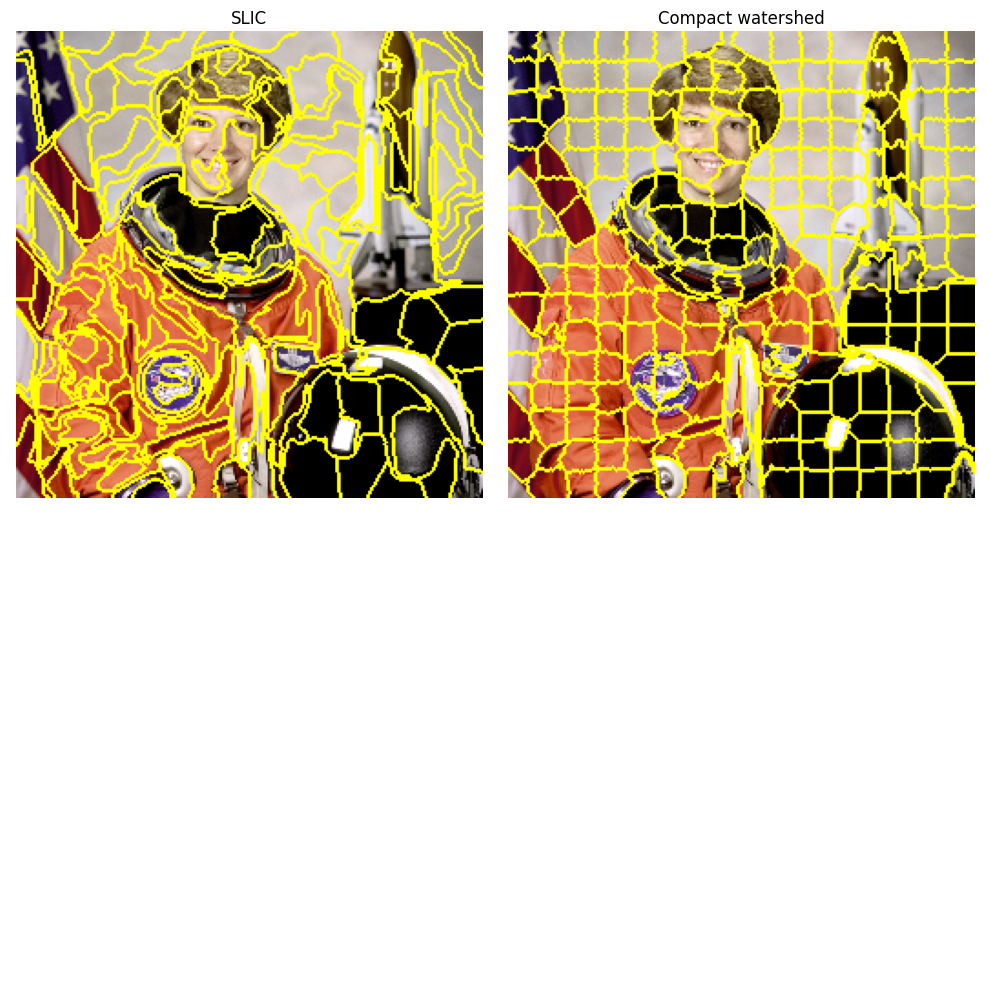

In [9]:
img = img_as_float(astronaut()[::2, ::2])
segments_slic = slic(img, n_segments=250, compactness=1, sigma=2)
gradient = sobel(rgb2gray(img))
#call watershed with segment compactness = 0.1
segments_watershed = watershed(gradient, markers=250, compactness=0.01)
#count the number of segments
print('SLIC number of segments:{}'.format(len(np.unique(segments_slic))))
print('watershed number of segments:{}'.format(len(np.unique(segments_watershed))))
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True,
sharey=True)
ax[0, 0].imshow(mark_boundaries(img, segments_slic))
ax[0, 0].set_title('SLIC')
ax[0, 1].imshow(mark_boundaries(img, segments_watershed))
ax[0, 1].set_title('Compact watershed')
for a in ax.ravel():
    a.set_axis_off()
plt.tight_layout()
plt.show()

(346, 360, 3)
(512, 256, 3)


ValueError: The input image is too small given the values of pixels_per_cell and cells_per_block. It should have at least: 16 rows and 16 cols.

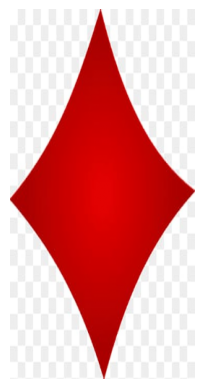

In [10]:
# HOG descriptor computation:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
img = imread('./images/red_dia.jpg')
plt.axis("off")
plt.imshow(img)
print(img.shape)
resized_img = resize(img, (128*4, 64*4))
plt.axis("off")
plt.imshow(resized_img)
print(resized_img.shape)
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2, 2), visualize=True,channel_axis=True)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")
plt.show()

ValueError: The input image is too small given the values of pixels_per_cell and cells_per_block. It should have at least: 16 rows and 16 cols.

Number of keypoints detected in the training image: 1165
Number of keypoints detected in the test image: 118


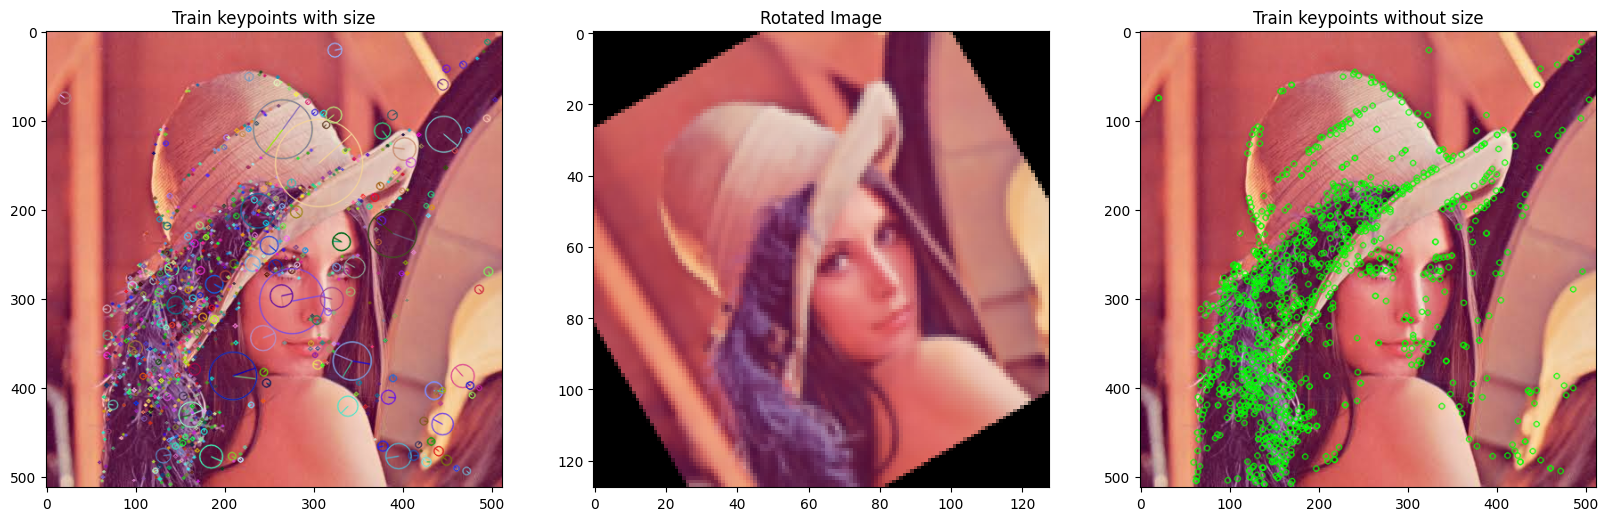

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image1 = cv2.imread('./images/lenna.png')

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Create the test image by adding scale and rotation
test_image = cv2.pyrDown(training_image)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((num_cols / 2, num_rows / 2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Create SIFT detector
sift = cv2.SIFT_create()

# Detect and compute keypoints and descriptors for training and test images
train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

# Copy training image for keypoints visualization
keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

# Draw keypoints on the training image
cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color=(0, 255, 0))
cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fig, plots = plt.subplots(1, 3, figsize=(20, 10))

plots[0].set_title("Train keypoints with size")
plots[0].imshow(keypoints_with_size)

plots[1].set_title("Rotated Image")
plots[1].imshow(test_image)

plots[2].set_title("Train keypoints without size")
plots[2].imshow(keypoints_without_size)

# Print the number of keypoints detected in the training image
print(f"Number of keypoints detected in the training image: {len(train_keypoints)}")

# Print the number of keypoints detected in the test image
print(f"Number of keypoints detected in the test image: {len(test_keypoints)}")

# Show the plot
plt.show()


SLIC number of segments:150
watershed number of segments:256


IndexError: boolean index did not match indexed array along dimension 0; dimension is 512 but corresponding boolean dimension is 256

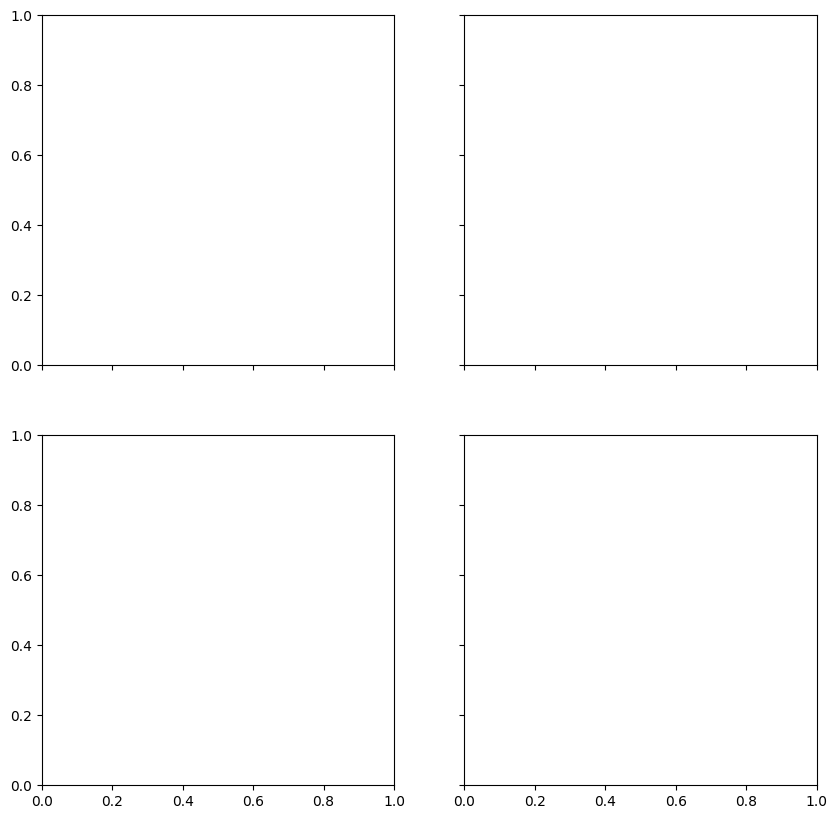

In [20]:
# Load the image
img = plt.imread('./images/lenna.png')

if img.shape[-1] == 4:
    # Convert RGBA image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)

# Convert the image to float format if necessary
img = img.astype(np.float32)

# Downsample the image
downsampled_img = img[::2, ::2]

segments_slic = slic(downsampled_img, n_segments=250, compactness=1, sigma=2)
gradient = sobel(rgb2gray(img))
#call watershed with segment compactness = 0.1
segments_watershed = watershed(gradient, markers=250, compactness=0.01)
#count the number of segments
print('SLIC number of segments:{}'.format(len(np.unique(segments_slic))))
print('watershed number of segments:{}'.format(len(np.unique(segments_watershed))))
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True,
sharey=True)
ax[0, 0].imshow(mark_boundaries(img, segments_slic))
ax[0, 0].set_title('SLIC')
ax[0, 1].imshow(mark_boundaries(img, segments_watershed))
ax[0, 1].set_title('Compact watershed')
for a in ax.ravel():
    a.set_axis_off()
plt.tight_layout()
plt.show()

SLIC number of segments: 150
Watershed number of segments: 256


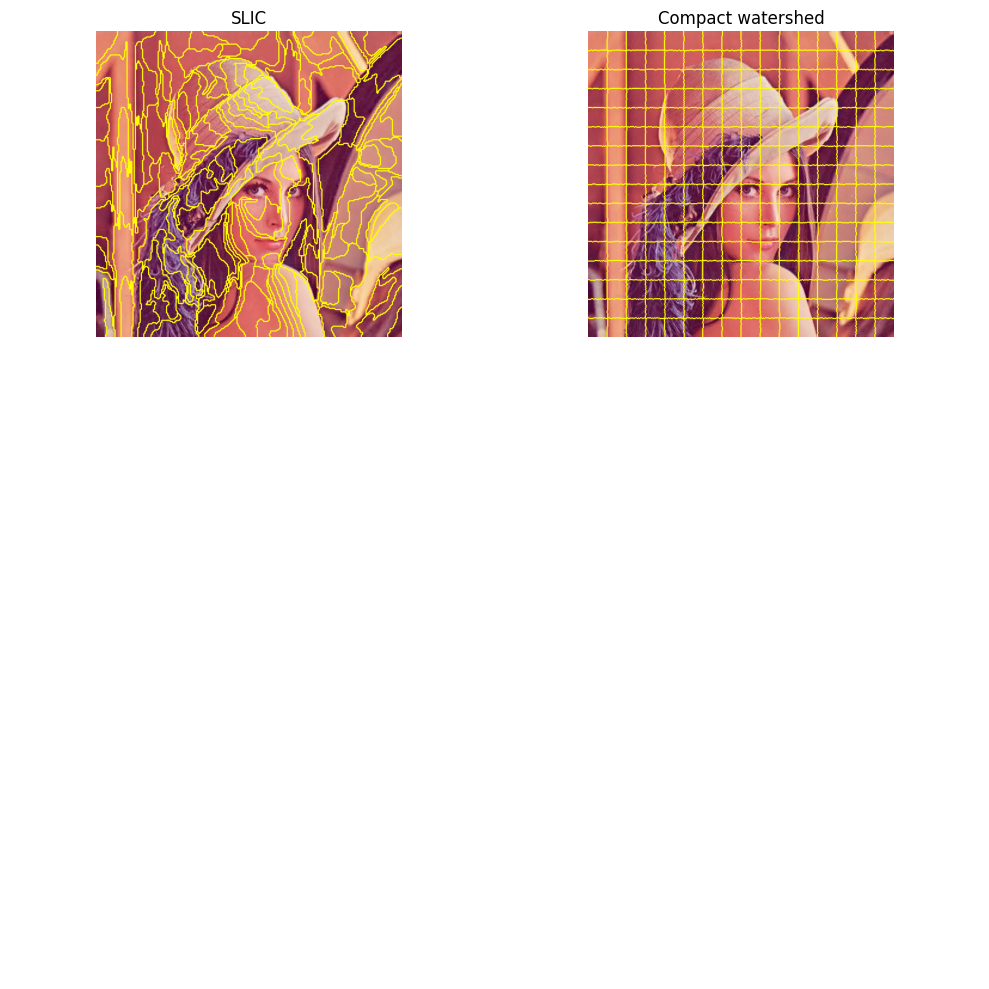

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage.segmentation import slic, watershed, mark_boundaries
from skimage.filters import sobel

# Load the image
img = plt.imread('./images/lenna.png')

# Check if the image has an alpha channel (fourth channel)
if img.shape[-1] == 4:
    # Convert RGBA image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)

# Convert the image to float format if necessary
img = img.astype(np.float32)

# Downsample the image
downsampled_img = img[::2, ::2]

# Perform SLIC segmentation on the downsampled image
segments_slic = slic(downsampled_img, n_segments=250, compactness=1, sigma=2)
segments_slic2 = slic(downsampled_img, n_segments=350, compactness=1.5, sigma=2.5)
segments_slic3 = slic(downsampled_img, n_segments=150, compactness=0.5, sigma=1)
segments_slic4 = slic(downsampled_img, n_segments=50, compactness=0.25, sigma=0.5)

# Convert the original image to grayscale
gray_img = color.rgb2gray(img)

# Calculate the gradient of the grayscale image using sobel
gradient = sobel(gray_img)

# Perform watershed segmentation using the gradient and 250 markers
segments_watershed = watershed(gradient, markers=250, compactness=0.1)
segments_watershed = watershed(gradient, markers=250, compactness=0.1)
segments_watershed = watershed(gradient, markers=250, compactness=0.1)
segments_watershed = watershed(gradient, markers=250, compactness=0.1)

# Resize the SLIC segmentation result back to the original image size
segments_slic = cv2.resize(segments_slic, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)

# Print the number of segments detected by each method
print(f"SLIC number of segments: {len(np.unique(segments_slic))}")
print(f"Watershed number of segments: {len(np.unique(segments_watershed))}")

# Create a figure with 2x2 subplots
fig, ax = plt.subplots(3, 2, figsize=(10, 10), sharex=True, sharey=True)

# Display the SLIC segmentation
ax[0, 0].imshow(mark_boundaries(img, segments_slic))
ax[0, 0].set_title('SLIC')

# Display the watershed segmentation
ax[0, 1].imshow(mark_boundaries(img, segments_watershed))
ax[0, 1].set_title('Compact watershed')

# ax[1, 0].imshow(mark_boundaries(img, segments_slic4))
# ax[1, 0].set_title('SLIC n_seg 350 , compact 1.5 ,sigma=2.5')
# Turn off the axes for all subplots
for subplot in ax.ravel():
    subplot.axis('off')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()
